# Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

2024-04-25 21:20:07.493471: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-25 21:20:07.493563: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-25 21:20:07.493611: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-25 21:20:07.507121: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Setting up Training Data

In [2]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
    print("{} degrees Celsius = {} degrees Fahrenheit".format(c, fahrenheit_a[i]))

-40.0 degrees Celsius = -40.0 degrees Fahrenheit
-10.0 degrees Celsius = 14.0 degrees Fahrenheit
0.0 degrees Celsius = 32.0 degrees Fahrenheit
8.0 degrees Celsius = 46.0 degrees Fahrenheit
15.0 degrees Celsius = 59.0 degrees Fahrenheit
22.0 degrees Celsius = 72.0 degrees Fahrenheit
38.0 degrees Celsius = 100.0 degrees Fahrenheit


# Create the model

## Build a layer
We'll call the layer l0 and create it by instantiating tf.keras.layers.Dense with the following configuration:

input_shape=[1] — This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The single value is a floating point number, representing degrees Celsius.

units=1 — This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem (more later). Since this is the final layer, it is also the size of the model's output — a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [3]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

## Assemble layers into the model

In [4]:
model = tf.keras.Sequential([l0])

2024-04-25 21:20:12.900836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 21:20:12.914922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 21:20:12.915036: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 21:20:12.922332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-25 21:20:12.922451: I tensorflow/compile

## Note

often we see the layers defined inside the model definition, rather than beforehand:

In [5]:
model_condensed = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

## Compile the model, with loss and optimizer functions

In [6]:
model.compile(loss="mean_squared_error", optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

In [7]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print("Finished training the model")

2024-04-25 21:20:16.295002: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fef7cf157b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-25 21:20:16.295161: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Quadro T2000, Compute Capability 7.5
2024-04-25 21:20:16.321360: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-25 21:20:16.401239: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2024-04-25 21:20:16.715537: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Finished training the model


# Display training statistics

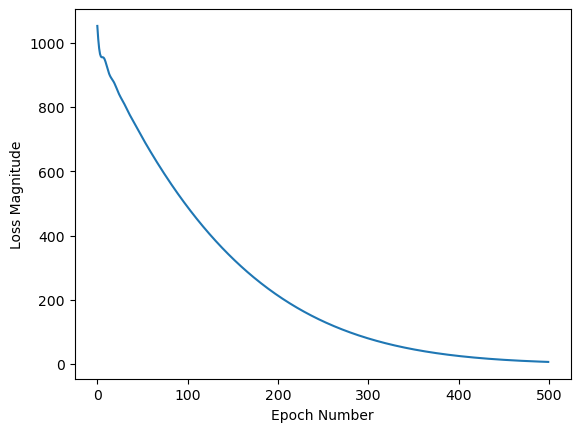

In [8]:
import matplotlib.pyplot as plt

plt.xlabel("Epoch Number")
plt.ylabel("Loss Magnitude")
plt.plot(history.history["loss"])

# Use the model to predict values

In [9]:
model.predict([100.0])

1/1 [==============================] - 0s 243ms/step


array([[211.33777]], dtype=float32)

# Print Variable and match to Formula

f=c×1.8+32

In [10]:
print("These are the layer variables: {}".format(l0.get_weights()))

These are the layer variables: [array([[1.8201056]], dtype=float32), array([29.327217], dtype=float32)]
